In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('pgaTourData.csv')
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [38]:
# looks at the data types
df.dtypes

Player Name            object
Rounds                float64
Fairway Percentage    float64
Year                    int64
Avg Distance          float64
gir                   float64
Average Putts         float64
Average Scrambling    float64
Average Score         float64
Points                 object
Wins                  float64
Top 10                float64
Average SG Putts      float64
Average SG Total      float64
SG:OTT                float64
SG:APR                float64
SG:ARG                float64
Money                  object
Money_int             float64
dtype: object

In [60]:
# looking at the data again for anuy platers with no rounds
df[df['Rounds'].isnull()]['Rounds']

1678   NaN
1679   NaN
1680   NaN
1681   NaN
1682   NaN
        ..
2307   NaN
2308   NaN
2309   NaN
2310   NaN
2311   NaN
Name: Rounds, Length: 634, dtype: float64

In [ ]:
drop 

In [78]:
#cleaning up the money column
# remove the '$' sign
df['Money_int'] = df['Money'].str.split('$').str[-1]
# remove the ','
df['Money_int'].replace(',','', regex=True, inplace=True)
df['Money_int'] = pd.to_numeric(df['Money_int'])
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,Money_int
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487",2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203",2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018",2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608",1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763",1089763.0


In [88]:
# Looking at the corrolation bewteen the money list and the rest of the stats recorded with pearson test. 
# We see that the Wins has a good corrolation but top 10's is higher still.
# SG total also shows a good result.
df_corr = df.corr()
df_corr

,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money_int
Rounds,1.000000,0.083597,0.078522,0.069599,0.252190,-0.125943,0.227928,-0.313380,-0.097741,0.211198,0.173218,0.317011,0.164208,0.192764,0.112364,0.278091
Fairway Percentage,0.083597,1.000000,-0.111042,-0.533832,0.343115,0.162757,0.236281,-0.170017,-0.098652,0.024990,-0.043493,0.162458,0.179032,0.155015,0.000356,0.016237
Year,0.078522,-0.111042,1.000000,0.221102,-0.000044,-0.145524,0.107181,-0.006801,0.060289,0.076493,0.023785,0.029939,0.003330,0.009928,0.035493,0.081792
Avg Distance,0.069599,-0.533832,0.221102,1.000000,0.292965,0.167314,-0.228979,-0.273230,0.247126,0.226512,-0.136676,0.278923,0.604456,0.142217,-0.191637,0.329295
gir,0.252190,0.343115,-0.000044,0.292965,1.000000,0.549402,0.038068,-0.485030,0.267357,0.276390,-0.231629,0.487778,0.582466,0.577074,-0.103955,0.313770
Average Putts,-0.125943,0.162757,-0.145524,0.167314,0.549402,1.000000,-0.549805,0.263041,-0.209932,-0.245181,-0.720328,-0.265734,0.293925,0.133635,-0.449081,-0.257832
Average Scrambling,0.227928,0.236281,0.107181,-0.228979,0.038068,-0.549805,1.000000,-0.518057,0.248329,0.311253,0.458220,0.517527,-0.024871,0.196124,0.613776,0.317777
Average Score,-0.313380,-0.170017,-0.006801,-0.273230,-0.485030,0.263041,-0.518057,1.000000,-0.477661,-0.700529,-0.364817,-0.962318,-0.530624,-0.669370,-0.390284,-0.746499
Wins,-0.097741,-0.098652,0.060289,0.247126,0.267357,-0.209932,0.248329,-0.477661,1.000000,0.450695,0.216024,0.470284,0.244059,0.348876,0.217539,0.721482
Top 10,0.211198,0.024990,0.076493,0.226512,0.276390,-0.245181,0.311253,-0.700529,0.450695,1.000000,0.270748,0.695163,0.352702,0.457636,0.254826,0.808836


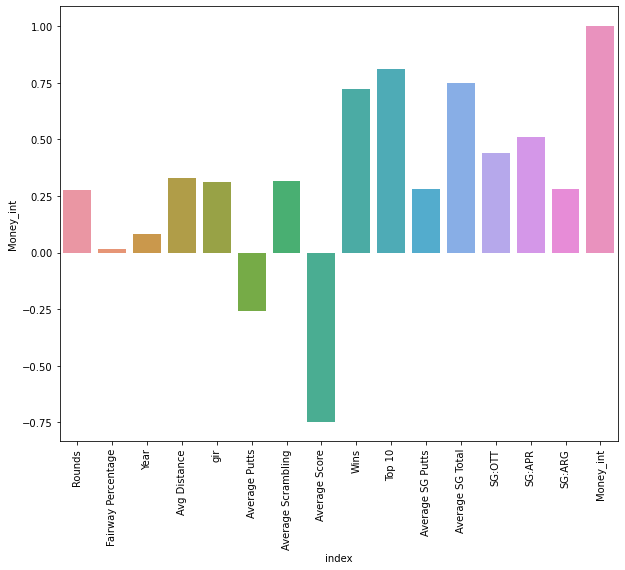

In [90]:
# looking at the plots of the money corr
plt.figure(figsize=(10,8))
sns.barplot(data=df_corr.reset_index(), x='index', y='Money_int')
plt.xticks(rotation=90)
plt.show()